In [1]:
import pandas as pd
import numpy as np
#import PI_client as pc
import matplotlib
import sklearn as sk
from sklearn import linear_model

In [79]:
# Reading in data, setting index
df = pd.read_csv('scc_data_to_use_no_outliers.csv')


In [80]:
# Splitting into training and testing sets
train = df.sample(frac=.7).copy()
test = df.drop(train.index).copy()

In [82]:
# Separating features from labels
col = df.columns
col = col[0:len(col)-1]

x_train = pd.DataFrame(index=train.index, data=train[col])
y_train= pd.DataFrame(index=train.index, data=train["Occupancy"])

x_test = pd.DataFrame(index=test.index, data=test[col])
y_test= pd.DataFrame(index=test.index, data=test["Occupancy"])

In [83]:
# Creating and training logistic regression model
mod = linear_model.LogisticRegression(solver="sag",max_iter=3000)
LR_model = mod.fit(x_train,y_train["Occupancy"])

In [84]:
df.iloc[:,0:3]

,AP Connection Count,Electricity Demand kBTU/h,Day of Week
0,0.648101,0.508301,0.666667
1,0.577215,0.495425,0.666667
2,0.506329,0.514953,0.666667
3,0.512658,0.464681,0.666667
4,0.517722,0.470615,0.666667
5,0.484810,0.488898,0.666667
6,0.464557,0.508465,0.666667
7,0.526582,0.468926,0.666667
8,0.565823,0.480220,0.666667
9,0.527848,0.452174,0.666667


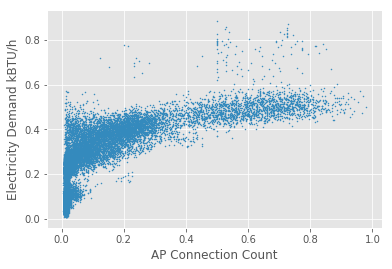

In [85]:
df.plot.scatter('AP Connection Count', 'Electricity Demand kBTU/h', s=1)

In [92]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, verbose=2, perplexity=100, n_iter=300)

X_2d = tsne.fit_transform(df.iloc[:,0:3])

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 18596 samples in 0.026s...
[t-SNE] Computed neighbors for 18596 samples in 1.909s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18596
[t-SNE] Computed conditional probabilities for sample 2000 / 18596
[t-SNE] Computed conditional probabilities for sample 3000 / 18596
[t-SNE] Computed conditional probabilities for sample 4000 / 18596
[t-SNE] Computed conditional probabilities for sample 5000 / 18596
[t-SNE] Computed conditional probabilities for sample 6000 / 18596
[t-SNE] Computed conditional probabilities for sample 7000 / 18596
[t-SNE] Computed conditional probabilities for sample 8000 / 18596
[t-SNE] Computed conditional probabilities for sample 9000 / 18596
[t-SNE] Computed conditional probabilities for sample 10000 / 18596
[t-SNE] Computed conditional probabilities for sample 11000 / 18596
[t-SNE] Computed conditional probabilities for sample 12000 / 18596
[t-SNE] Computed conditional probabilities for sa

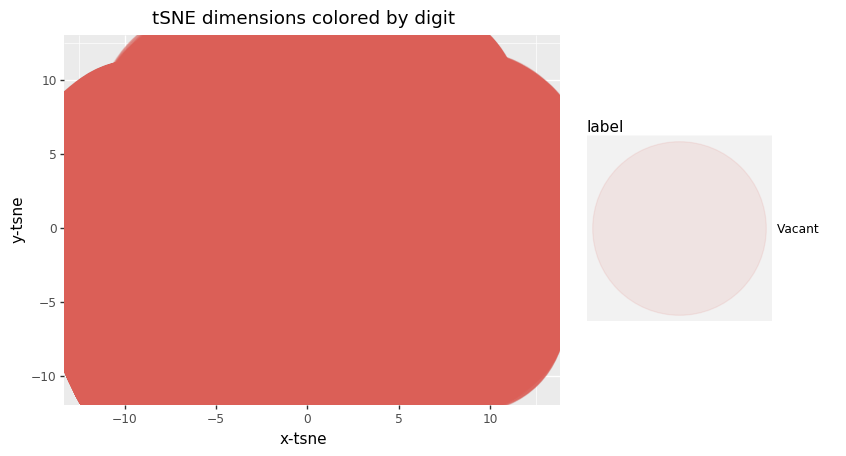

<ggplot: (-9223371877939921215)>

In [44]:
from plotnine import *

df_tsne = df.iloc[:,0:3].copy()
df_tsne['x-tsne'] = X_2d[:,0]
df_tsne['y-tsne'] = X_2d[:,1]

chart = (ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit"))
chart

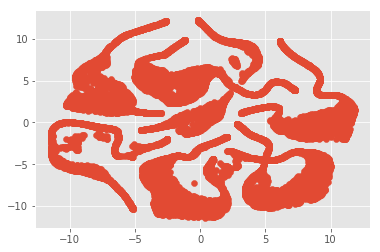

In [93]:
plt.scatter(X_2d[:,0], X_2d[:,1])

In [47]:
X_2d

array([[-6.3785233 , -0.85821164],
       [-6.357432  , -1.1036646 ],
       [-6.3020277 , -1.6911374 ],
       ...,
       [-9.679255  ,  1.3874851 ],
       [-8.804617  ,  1.1034151 ],
       [-2.6195033 ,  7.362678  ]], dtype=float32)

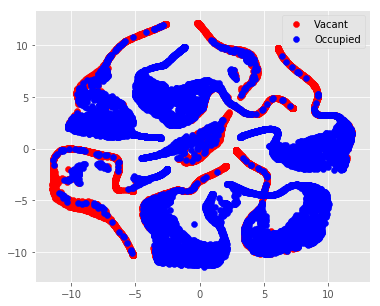

In [95]:
target_ids = range(2)

plt.figure(figsize=(6, 5))
colors = 'r', 'b'
for i, c, label in zip(target_ids, colors, ['Vacant', 'Occupied']):
    plt.scatter(X_2d[df['Occupancy'] == i, 0], X_2d[df['Occupancy'] == i, 1], c=c, label=label)
plt.legend()
plt.show()


In [55]:
np.ravel(y_train)

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [86]:

from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=10, n_estimators=100)
rf.fit(x_train, np.ravel(y_train))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
y_pred_rf = rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

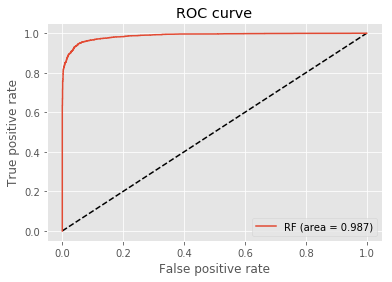

In [88]:

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

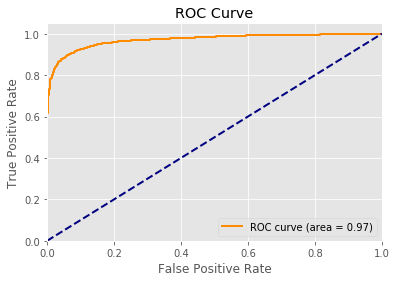

In [89]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#%matplotlib inline

y_predict_probabilities = LR_model.predict_proba(x_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [9]:
y_predict_probabilities

array([0.99999979, 0.99999886, 0.99999808, ..., 0.99315563, 0.96514001,
       0.96557873])

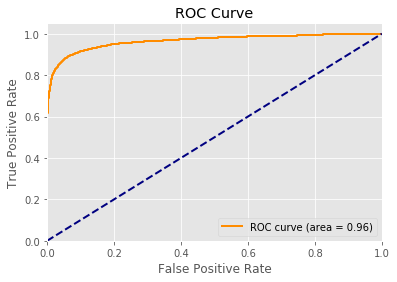

In [12]:

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [90]:
# Extracting accuracy
accuracy = LR_model.score(x_test,y_test)
accuracy

0.9153970245563721

In [91]:
# Converting accuracy to error
error = 1-accuracy
error

0.08460297544362794